<a href="https://colab.research.google.com/github/Anirudh1905/Data_Analytics/blob/master/LIK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
tb1=pd.read_excel('/content/drive/My Drive/Colab Notebooks/regcar.xlsx')
tb1

,TV_Ads,Cars Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [5]:
import statsmodels.api as sm
x=tb1['TV_Ads']
y=tb1['Cars Sold']
x2=sm.add_constant(x)
mod1=sm.OLS(y,x2).fit()
mod1.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Cars Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Tue, 10 Mar 2020   Prob (F-statistic):             0.0190
Time:                        14:26:35   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.024       2.469      17.531
TV_Ads         5.0000      1.080      4.629      0.019       1.563       8.437
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.214
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.674
Skew:                           0.256   Prob(JB):                        0.714
Kurtosis:                       1.276   Cond. No.                         6.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
e=mod1.resid
e

0   -1.0
1   -1.0
2   -2.0
3    2.0
4    2.0
dtype: float64

In [0]:
def lik(parameters):
  m=parameters[0]
  b=parameters[1]
  sigma=parameters[2]
  for i in np.arange(0,len(x)):
    y_exp=m*x+b
    L=(len(x)/2 * np.log(2*np.pi) + len(x)/2 * np.log(sigma**2) +1 / (2* sigma **2)* sum((y-y_exp)**2))
  return L

In [14]:
lik_model=minimize(lik,np.array([2,2,2]),method='Nelder-Mead')
lik_model

 final_simplex: (array([[ 5.00000631, 10.00000822,  1.67332132],
       [ 4.99996581, 10.00008112,  1.67332683],
       [ 4.99998382, 10.00002278,  1.67329385],
       [ 5.00001119,  9.9999767 ,  1.67334933]]), array([9.66874121, 9.66874121, 9.66874121, 9.66874121]))
           fun: 9.668741209395263
       message: 'Optimization terminated successfully.'
          nfev: 212
           nit: 118
        status: 0
       success: True
             x: array([ 5.00000631, 10.00000822,  1.67332132])

In [15]:
lik_model.x

array([ 5.00000631, 10.00000822,  1.67332132])

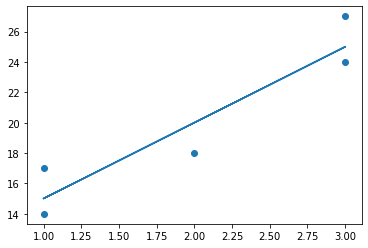

In [16]:
plt.scatter(x,y)
plt.plot(x,lik_model['x'][0] * x + lik_model['x'][1])
plt.show()